(0, 100)

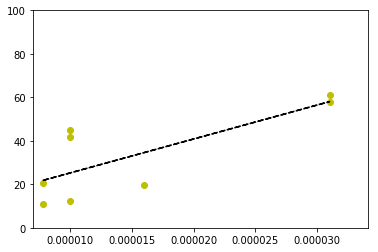

In [15]:
import numpy as np
import matplotlib.pyplot as plt

x = [7.8e-6,1.0e-5,1.0e-5,3.1e-5,3.1e-5,1.6e-5,1.0e-5,7.8e-6]
y = [20.6,41.8,45.2,61.0,58.0,19.9,12.3,11.0] # 10, not 9, so the fit isn't perfect

fit = np.polyfit(x,y,1)
fit_fn = np.poly1d(fit) 
# fit_fn is now a function which takes in x and returns an estimate for y

plt.plot(x,y, 'yo', x, fit_fn(x), '--k')
plt.xlim(7.8e-6-(7.8e-6*.10), 3.1e-5+(3.1e-5*.10))
plt.ylim(0, 100)

Raw fit results:
poly([2.77233364e-06 3.75913013e-07])
[array([2.84649093e-10]), 2, array([1.36818906, 0.3578529 ]), 1.7763568394002505e-15]
Fit: y = 0.000x + 0.000 (rms residual = 99.9999%)


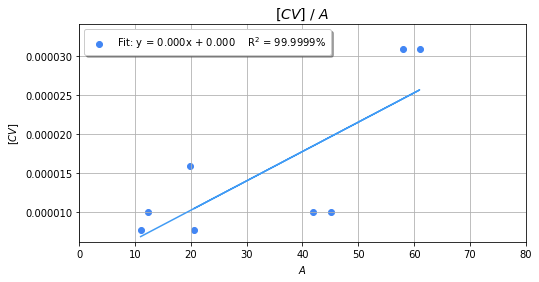

In [30]:
import math
import numpy as np
import matplotlib.pyplot as plt
#from basic_units import radians, degrees
from matplotlib.pyplot import figure, show
from matplotlib.cbook import iterable
Polynomial = np.polynomial.Polynomial

# The data
y = np.array([7.8e-6,1.0e-5,1.0e-5,3.1e-5,3.1e-5,1.6e-5,1.0e-5,7.8e-6])
x = np.array([20.6,41.8,45.2,61.0,58.0,19.9,12.3,11.0])

cmin, cmax = min(x), max(x)
pfit, stats = Polynomial.fit(x, y, 1, full=True, window=(cmin, cmax),
                                                    domain=(cmin, cmax))

print('Raw fit results:', pfit, stats, sep='\n')

y0, m = pfit
resid, rank, sing_val, rcond = stats
rms = np.sqrt(resid[0]/len(y))

print('Fit: y = {:.3f}x + {:.3f}'.format(m, y0),
      '(rms residual = {:.4%})'.format((1 -rms / 10)))


#print(x)
fig, ax = plt.subplots(figsize=(8, 4))
ax.grid()
ax.scatter(x, y, label='Fit: y = {:.3f}x + {:.3f}'.format(m, y0) + '    ' + r'$\mathrm{R}^2$' + ' = {:.4%}'.format((1 -rms / 10)), color='#4286f4')
ax.plot(x, pfit(x), color='#419bf4')

ax.set(xlabel='$A$', ylabel='$[CV]$',
       title='$[CV]$ / $A$')

plt.title('$[CV]$ / $A$', fontsize=14)

ax.legend(loc = 2, prop={'size': 10}, framealpha=1, shadow=True, borderpad=0.5)

plt.ylim(7.8e-6-(7.8e-6*.20), 3.1e-5+(3.1e-5*.10))
plt.xlim(0, 80)

plt.savefig('sf.png', dpi=600)
plt.show()